# 셀프 주유소는 정말 저렴할까?

In [1]:
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

### 1. 서울시 구별 주유소 가격 정보 얻기

In [2]:
url = 'https://www.opinet.co.kr/user/main/mainView.do'
driver = webdriver.Chrome()
driver.get(url)

In [3]:
# 싼 주유소 찾기
driver.find_element_by_css_selector('.ic_m1').click()

In [4]:
# 서울 자치구 리스트 가져오기
metro = driver.find_element_by_xpath('//*[@id="SIDO_NM0"]')     # 광역시도
metro.send_keys('서울')
time.sleep(1)

In [8]:
sigungu = driver.find_element_by_xpath('//*[@id="SIGUNGU_NM0"]')     # 시군구
gu_list = sigungu.find_elements_by_css_selector('option')
gu_names = [gu.text for gu in gu_list]
del gu_names[0]                         # 시/군/구

In [10]:
# 엑셀저장
driver.find_element_by_xpath('//*[@id="glopopd_excel"]/span').click()

In [11]:
# 25개 자치구에 대해서 주유소 정보 엑셀 저장
for gu in gu_names:
    sigungu = driver.find_element_by_xpath('//*[@id="SIGUNGU_NM0"]')
    sigungu.send_keys(gu)
    time.sleep(2)

    driver.find_element_by_xpath('//*[@id="glopopd_excel"]/span').click()
    time.sleep(2)

In [12]:
driver.close()

### 2. 구별 휘발유 가격에 대한 데이터 정리

In [33]:
import pandas as pd
from glob import glob
import warnings
warnings.filterwarnings('ignore')

In [14]:
glob('C:/Users/ezen/Downloads/지역*.xls')

['C:/Users/ezen/Downloads\\지역_위치별(주유소) (1).xls',
 'C:/Users/ezen/Downloads\\지역_위치별(주유소) (10).xls',
 'C:/Users/ezen/Downloads\\지역_위치별(주유소) (11).xls',
 'C:/Users/ezen/Downloads\\지역_위치별(주유소) (12).xls',
 'C:/Users/ezen/Downloads\\지역_위치별(주유소) (13).xls',
 'C:/Users/ezen/Downloads\\지역_위치별(주유소) (14).xls',
 'C:/Users/ezen/Downloads\\지역_위치별(주유소) (15).xls',
 'C:/Users/ezen/Downloads\\지역_위치별(주유소) (16).xls',
 'C:/Users/ezen/Downloads\\지역_위치별(주유소) (17).xls',
 'C:/Users/ezen/Downloads\\지역_위치별(주유소) (18).xls',
 'C:/Users/ezen/Downloads\\지역_위치별(주유소) (19).xls',
 'C:/Users/ezen/Downloads\\지역_위치별(주유소) (2).xls',
 'C:/Users/ezen/Downloads\\지역_위치별(주유소) (20).xls',
 'C:/Users/ezen/Downloads\\지역_위치별(주유소) (21).xls',
 'C:/Users/ezen/Downloads\\지역_위치별(주유소) (22).xls',
 'C:/Users/ezen/Downloads\\지역_위치별(주유소) (23).xls',
 'C:/Users/ezen/Downloads\\지역_위치별(주유소) (24).xls',
 'C:/Users/ezen/Downloads\\지역_위치별(주유소) (25).xls',
 'C:/Users/ezen/Downloads\\지역_위치별(주유소) (3).xls',
 'C:/Users/ezen/Downloads\\지역_위치별(주유소) (4).xls',
 'C:

In [15]:
file = glob('C:/Users/ezen/Downloads/지역*.xls')[0]
df = pd.read_excel(file, header=2)
df.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,방죽주유소,서울 강남구 밤고개로 215 (율현동),GS칼텍스,02-459-3434,Y,-,1977,1969,-
1,서울특별시,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),SK에너지,02-445-6870,Y,-,1979,1915,-
2,서울특별시,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),현대오일뱅크,02-529-5101,Y,2164,1983,1945,-
3,서울특별시,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),SK에너지,02-3462-5100,Y,2144,1983,1960,-
4,서울특별시,현대오일뱅크(주)직영 산성셀프주유소,서울 강남구 헌릉로 730,현대오일뱅크,02-2226-4963,Y,2165,1985,1925,-


In [16]:
# 25개 파일을 읽어서 하나의 데이터 프레임으로 만들기
df_list = []
for file in glob('C:/Users/ezen/Downloads/지역*.xls'):
    gs = pd.read_excel(file, header=2)
    df_list.append(gs)

df = pd.concat(df_list)
df.shape

(464, 10)

In [17]:
df = df[['상호','주소','휘발유','셀프여부','상표']]
df.head()

,상호,주소,휘발유,셀프여부,상표
0,방죽주유소,서울 강남구 밤고개로 215 (율현동),1977,Y,GS칼텍스
1,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),1979,Y,SK에너지
2,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1983,Y,현대오일뱅크
3,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),1983,Y,SK에너지
4,현대오일뱅크(주)직영 산성셀프주유소,서울 강남구 헌릉로 730,1985,Y,현대오일뱅크


In [18]:
df.rename(columns={'휘발유':'가격', '셀프여부':'셀프'}, inplace=True)
df.tail()

,상호,주소,가격,셀프,상표
10,신성주유소,서울 노원구 월계로 328 (월계동),1998,Y,S-OIL
11,상계동주유소,서울 노원구 노원로26길 191 (상계동),2090,N,현대오일뱅크
12,하계삼호주유소,서울 노원구 공릉로 294 (하계동),2095,N,GS칼텍스
13,노원주유소,서울 노원구 동일로 1008 (공릉동),2100,N,GS칼텍스
14,(주)소모에너지 수락산셀프주유소,서울 노원구 동일로 1772,2198,Y,GS칼텍스


In [20]:
df['구'] = df.주소.str.split().str[1]
df.head()

,상호,주소,가격,셀프,상표,구
0,방죽주유소,서울 강남구 밤고개로 215 (율현동),1977,Y,GS칼텍스,강남구
1,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),1979,Y,SK에너지,강남구
2,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1983,Y,현대오일뱅크,강남구
3,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),1983,Y,SK에너지,강남구
4,현대오일뱅크(주)직영 산성셀프주유소,서울 강남구 헌릉로 730,1985,Y,현대오일뱅크,강남구


In [21]:
df.구.unique()

array(['강남구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구',
       '송파구', '양천구', '강동구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구',
       '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구'], dtype=object)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 464 entries, 0 to 14
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상호      464 non-null    object
 1   주소      464 non-null    object
 2   가격      464 non-null    object
 3   셀프      464 non-null    object
 4   상표      464 non-null    object
 5   구       464 non-null    object
dtypes: object(6)
memory usage: 41.5+ KB


In [23]:
# 가격이 '-' 는 삭제하고, 정수로 변환
df = df[df.가격 != '-']
df.가격 = df.가격.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456 entries, 0 to 14
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상호      456 non-null    object
 1   주소      456 non-null    object
 2   가격      456 non-null    int32 
 3   셀프      456 non-null    object
 4   상표      456 non-null    object
 5   구       456 non-null    object
dtypes: int32(1), object(5)
memory usage: 23.2+ KB


C:\Users\ezen\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [50]:
df.to_csv('서울_주유소(220418).csv', index=False)

### 3. 셀프 주유소가 정말 저렴한지 확인

In [24]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [25]:
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'Malgun Gothic'

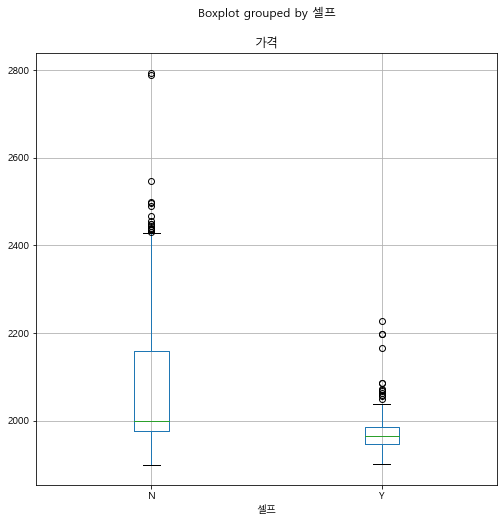

In [26]:
df.boxplot(column='가격', by='셀프', figsize=(8,8))
plt.show()

In [28]:
df[df.셀프 == 'Y'].가격.mean(), df[df.셀프 == 'N'].가격.mean()

(1973.4, 2090.8552036199094)

In [30]:
df[df.셀프 == 'Y'].shape, df[df.셀프 == 'N'].shape

((235, 6), (221, 6))

- 사이파이를 이용한 가설검정
    - 2-sample T 검정(독립표본 T 검정)

In [31]:
import scipy as sp
sp.stats.ttest_ind(df[df.셀프 == 'Y'].가격, df[df.셀프 == 'N'].가격, equal_var=False)

Ttest_indResult(statistic=-9.69265742083394, pvalue=5.098148364056242e-19)

- p-value가 0.05보다 작으므로 귀무가설 기각, 즉 대립가설 채택
    - H0(귀무가설): 셀프주유소와 일반주유소의 가격 차이가 없다.
    - H1(대립가설): 셀프주유소의 가격이 일반주유소보다 저렴하다.

- 상표별로 가격 확인

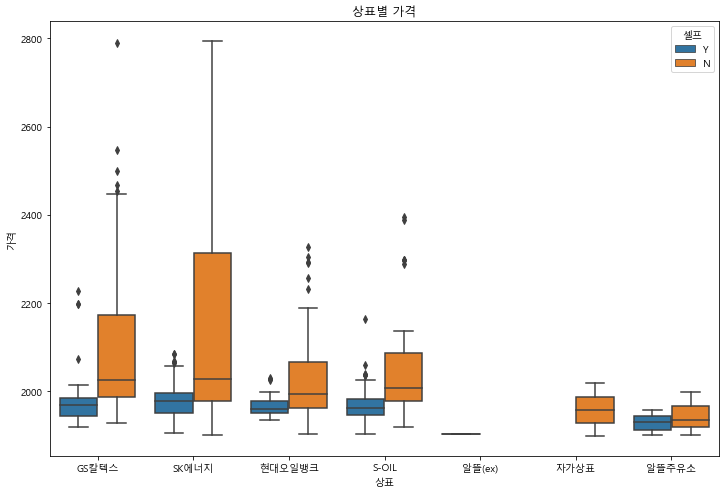

In [32]:
plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격', hue='셀프', data=df)
plt.title('상표별 가격')
plt.show()

### 4. 구별 휘발유 가격 비교

In [34]:
import json, folium

In [35]:
# 가격이 착한 주유소 Top 5
df.sort_values(by='가격').head()

,상호,주소,가격,셀프,상표,구
0,정호주유소,서울 성동구 고산자로 307 (마장동),1898,N,자가상표,성동구
0,가로공원주유소,서울 양천구 가로공원로 165 (신월동),1902,N,SK에너지,양천구
0,화곡역주유소,서울 강서구 강서로 154 (화곡동),1902,Y,알뜰주유소,강서구
1,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),1902,N,알뜰주유소,강서구
2,현대주유소,서울 양천구 남부순환로 372 (신월동),1904,Y,S-OIL,양천구


In [36]:
# 가격이 비싼 주유소 Top 5
df.sort_values(by='가격', ascending=False).head()

,상호,주소,가격,셀프,상표,구
9,서남주유소,서울 중구 통일로 30,2794,N,SK에너지,중구
12,서계주유소,서울특별시 용산구 청파로 367 (청파동),2789,N,GS칼텍스,용산구
32,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2548,N,GS칼텍스,강남구
8,필동주유소,서울 중구 퇴계로 196 (필동2가),2499,N,GS칼텍스,중구
31,선우상사Q엔느,서울 서초구 방배로 66 (방배동),2497,N,SK에너지,서초구


In [38]:
# 구별 비교
df.groupby('구')['가격'].agg(['mean','min','max']).sort_values(by='mean', ascending=False)

,mean,min,max
구,,,
용산구,2384.076923,2232,2789
중구,2288.100000,1959,2794
종로구,2243.500000,2049,2438
강남구,2131.848485,1977,2548
강동구,2072.928571,1969,2298
성동구,2070.470588,1898,2328
서초구,2047.968750,1904,2497
영등포구,2035.461538,1946,2428
구로구,2030.571429,1919,2448


- 구별 비교한 것을 단계구분도로 표시

In [39]:
gu_data = df.groupby('구')[['가격']].mean()
gu_data.head(3)

,가격
구,
강남구,2131.848485
강동구,2072.928571
강북구,1960.461538


In [45]:
filename = '../04.지도시각화/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(filename, encoding='utf-8'))

In [46]:
import numpy as np

def get_text_location(geo_str):
    gu_dict = {}
    for gu in geo_str['features']:
        for coord in gu['geometry']['coordinates']:
            geo = np.array(coord)
            gu_dict[gu['id']] = [np.mean(geo[:,1]), np.mean(geo[:,0])]
    return gu_dict

In [47]:
from folium.features import DivIcon

gu_dict = get_text_location(geo_str)

In [48]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')
folium.Choropleth(
    geo_data=geo_str,
    data=gu_data.가격,
    columns=[gu_data.index, gu_data.가격],
    fill_color='PuRd',
    key_on='feature.id'
).add_to(map)
for gu_name in gu_data.index:
    folium.Marker(
        location=gu_dict[gu_name],
        icon=DivIcon(icon_size=(80,20), icon_anchor=(20,0),
            html=f'<div style="font-size: 10pt">{gu_name}</div>'
        )
    ).add_to(map)
title_html = '<h3 align="center" style="font-size:20px">구별 휘발유 가격</h3>'    
map.get_root().html.add_child(folium.Element(title_html)) 
map